# Nickolaus White

## Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from PIL import Image
from sklearn import metrics
from sklearn import svm
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle 

## Functions

In [2]:
def checkUserId(id_input):
    
    # Retrieve image paths
    path = 'dataset'
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)] 
    
    # Compare input id and check if already exists
    for imagePath in imagePaths:
        id = os.path.split(imagePath)[-1].split(".")[1]
        if (id_input == id):
            return True

    return False

In [3]:
def fetchLastImageId(id_input):
    
    # Retrieve image paths
    path = 'dataset'
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)] 
    
    # Fetch last image id for the user
    ids = []
    for imagePath in imagePaths:
        id = int(os.path.split(imagePath)[-1].split(".")[2])
        ids.append(id)

    return max(ids)

In [4]:
def unique(list1):
 
    # Insert the list to the set
    list_set = set(list1)
    
    # Convert the set to the list
    unique_list = (list(list_set))

    return unique_list

In [5]:
def getImagesAndLabels_Extraction(path):

    detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:
        
        # Open image, convert image to grayscale
        PIL_img = Image.open(imagePath).convert('L') 
        img_numpy = np.array(PIL_img)
        
        # Obtain label (id) for image
        id = os.path.split(imagePath)[-1].split(".")[1]
        
        # Extract objects of different sizes in the input image
        faces = detector.detectMultiScale(img_numpy)
        
        # Append image and label to associated list(s)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
        
    return faceSamples, ids

In [6]:
def getImagesAndLabels_Preview(path):

    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:
        
        # Open image, convert image to grayscale
        PIL_img = Image.open(imagePath).convert('L') 
        img_numpy = np.array(PIL_img)
        
        # Obtain label (id) for image
        id = os.path.split(imagePath)[-1].split(".")[1]
        
        # Append image and label to associated list(s)
        faceSamples.append(img_numpy)
        ids.append(id)
        
    return faceSamples, ids

In [7]:
def addLabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 3), ha='center')

## Capture More Data (optional)

**Note**: Portions of the following code are a reference to Marcelo Rovai's [Real-Time Face Recognition: An End-To-End Project](https://towardsdatascience.com/real-time-face-recognition-an-end-to-end-project-b738bb0f7348).

### Convert the below cells to "Code" cells if wanting to run.

## Load in Data

In [29]:
# Gather images from face image database
path = 'dataset'
faces, ids = getImagesAndLabels_Extraction(path)

In [30]:
# Convert images to float32 & normalize
i = 0
for image in faces:
    faces[i] = np.array(image, dtype=np.float32)
    faces[i] /= 255
    faces[i].resize((150, 150))
    i += 1
faces = np.array(faces)

## Exploratory Data Analysis

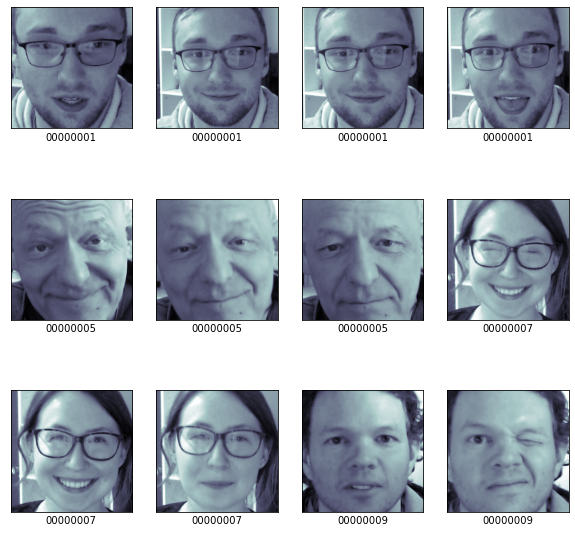

In [31]:
# Extract images for preview
path = 'dataset'
faces_p, ids_p = getImagesAndLabels_Preview(path)

# Preview images
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces_p[i*15], cmap="bone")
    axi.set(xticks=[], yticks=[], xlabel=ids_p[i*15])

In [32]:
# Gather unique Id's
uniqueIds = unique(ids)

# Gather the unique Id counts
data = {}
for x1 in uniqueIds:
    count = 0
    for x2 in ids:
        if (x1 == x2):
            count += 1
    data[x1] = count    
data    

{'00000001': 40, '00000005': 47, '00000007': 60, '00000009': 49}

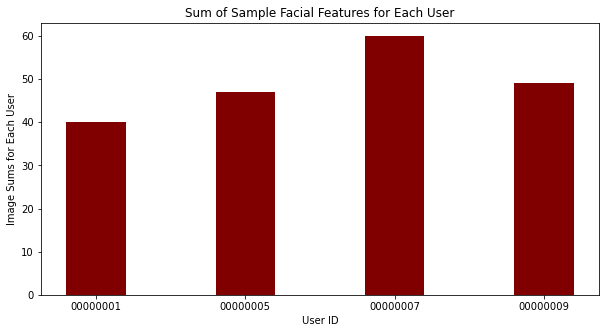

In [33]:
# Create lists for plot
classes = list(data.keys())
sums = list(data.values())

# Bar chart of class sums
fig = plt.figure(figsize = (10, 5))
plt.bar(classes, sums, color ='maroon', width = 0.4)
plt.xlabel("User ID")
plt.ylabel("Image Sums for Each User")
plt.title("Sum of Sample Facial Features for Each User")
plt.show()

## Create A Train & Test Set

In [13]:
# Reshape faces array
faces = faces.reshape(len(faces), -1)
faces.shape

# Split the data into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(faces, ids, random_state=0)

X_train = np.array(X_train)
print(X_train.shape)
Y_train = np.array(Y_train)
print(Y_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
Y_test = np.array(Y_test)
print(Y_test.shape)

(147, 22500)
(147,)
(49, 22500)
(49,)


### Unique Images in Training Set

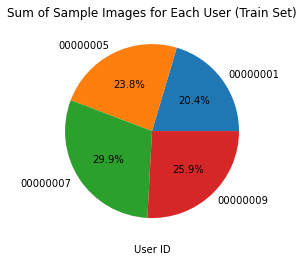

In [14]:
# Obtain unique ids and their counts
_, train_counts = np.unique(Y_train, return_counts=True)
mylabels = unique(ids)

# plot pie chart
plt.pie(train_counts, labels=mylabels, autopct='%1.1f%%')
plt.xlabel("User ID")
plt.title("Sum of Sample Images for Each User (Train Set)")
plt.show() 

### Unique Images in Testing Set

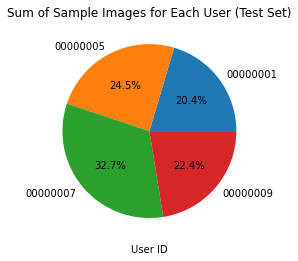

In [15]:
# Obtain unique ids and their counts
_, test_counts = np.unique(Y_test, return_counts=True)
mylabels = unique(ids)

# Plot pie chart
plt.pie(test_counts, labels=mylabels, autopct='%1.1f%%')
plt.xlabel("User ID")
plt.title("Sum of Sample Images for Each User (Test Set)")
plt.show() 

## Train & Test Models

### Standalone SVM to Modify & Learn From

In [16]:
# Instantiate scaling
my_scaler = StandardScaler()

# Scaler learns from the data how to perform the scaling
my_scaler.fit(X_train)

# Scale teh training set
X_train_scaled = my_scaler.transform(X_train)

# Scale the testing set
X_test_scaled = my_scaler.transform(X_test)

In [17]:
# Create SVM
clf = SVC(class_weight="balanced", random_state=0)

In [18]:
# Create grid search parameters
parameters = {"C":[0.1, 1, 10],
             "gamma":[1e-07, 1e-08, 1e-06],
              "kernel":["rbf", "linear"]
             }
grid_search = GridSearchCV(clf, parameters, n_jobs=2, cv=5)

In [19]:
grid_search.fit(X_train_scaled, Y_train)
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}


In [20]:
# Use best model to predict
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_scaled)

In [21]:
print(f"Accuracy: {clf_best.score(X_test_scaled, Y_test)*100:.1f}%")

Accuracy: 93.9%


In [22]:
# Print out classification report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

    00000001       0.91      1.00      0.95        10
    00000005       0.86      1.00      0.92        12
    00000007       1.00      0.81      0.90        16
    00000009       1.00      1.00      1.00        11

    accuracy                           0.94        49
   macro avg       0.94      0.95      0.94        49
weighted avg       0.95      0.94      0.94        49



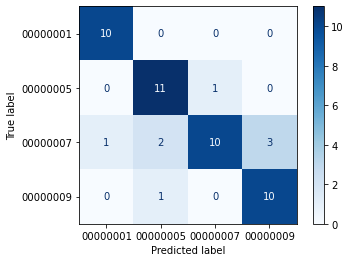

In [23]:
# Cross validation of size 3
image_pred = cross_val_predict(clf_best, X_test, Y_test, cv=3)

# Create Confusion matrix of results
cm = metrics.confusion_matrix(Y_test, image_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=mylabels)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

### Scikit-learn models

In [24]:
# Create object to hold classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(class_weight="balanced", random_state=0),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
]

### Gridsearchcv parameters

In [25]:
# Create a list of parameter dictionaries
parameters = []

# KNN 
temp = {
    "n_neighbors":[2,3,4,5,6,7,8]
}
parameters.append(temp)

# SVM 
temp = {
    "C":[0.1, 1, 10],
    "gamma":[1e-07, 1e-08, 1e-06],
    "kernel":["rbf", "linear"]
}
parameters.append(temp)

# Gaussian 
temp = {
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
}
parameters.append(temp)

# Decision Tree
temp = {
    "criterion":['gini','entropy'],
    "max_depth":[4,5,6,7,30,70,120]
}
parameters.append(temp)

# Random Forest 
temp = {
    'n_estimators': [200, 500],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
parameters.append(temp)

# MLP 
temp = {
    'solver': ['lbfgs'], 
    'max_iter': [1000,1200,1500,2000], 
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes':np.arange(10, 15)
}
parameters.append(temp)

# AdaBoost
temp = {
    "learning_rate": [0.5, 1, 5, 10],
    "n_estimators": [1, 2, 50, 100]
}
parameters.append(temp)

parameters

[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
 {'C': [0.1, 1, 10],
  'gamma': [1e-07, 1e-08, 1e-06],
  'kernel': ['rbf', 'linear']},
 {'kernel': [RBF(length_scale=0.1), RBF(length_scale=10)]},
 {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 30, 70, 120]},
 {'n_estimators': [200, 500],
  'max_depth': [2, 3, 4, 5, 6, 7, 8],
  'criterion': ['gini', 'entropy']},
 {'solver': ['lbfgs'],
  'max_iter': [1000, 1200, 1500, 2000],
  'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
         1.e-09]),
  'hidden_layer_sizes': array([10, 11, 12, 13, 14])},
 {'learning_rate': [0.5, 1, 5, 10], 'n_estimators': [1, 2, 50, 100]}]

### Run all models

In [26]:
# This is placed in the code for the max_iter warning when running the GaussianProcessClassifier
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Modify ids and X_train to run properly with models
ids = np.array(ids)    
X_train = pd.DataFrame(X_train)

# Initialize count and mean_scores list, start for-loop of classifiers
count = 0
mean_scores = []
for classifier in classifiers:
    
    # Run grid search
    grid_search = GridSearchCV(classifier, parameters[count], n_jobs=2, cv=5)
    grid_search.fit(X_train, Y_train)
    
    # Create the Pipeline with best fit model
    pipeline = make_pipeline(StandardScaler(), grid_search.best_estimator_)
    print(grid_search.best_estimator_)
    
    # Create a StratifiedKFold
    strtfdKFold = StratifiedKFold(n_splits=5)
    kfold = strtfdKFold.split(faces, ids)
    scores = []
    for k, (train, test) in enumerate(kfold):
        pipeline.fit(faces[train], ids[train])
        score = pipeline.score(faces[test], ids[test])
        scores.append(score)
    
    # Append mean of cross validation as accuracy score
    mean_scores.append(np.mean(scores))
    count += 1
    print(scores)

# Print out result from k-fold
print('Mean results from all models:')
print(mean_scores)

KNeighborsClassifier(n_neighbors=2)
[0.7, 0.9743589743589743, 0.8974358974358975, 0.8717948717948718, 0.9487179487179487]
SVC(C=0.1, class_weight='balanced', gamma=1e-07, kernel='linear',
    random_state=0)
[0.75, 0.9487179487179487, 0.9743589743589743, 0.9230769230769231, 0.9743589743589743]
GaussianProcessClassifier(kernel=RBF(length_scale=10))
[0.675, 0.9487179487179487, 0.9487179487179487, 0.8717948717948718, 0.8974358974358975]
DecisionTreeClassifier(criterion='entropy', max_depth=4)
[0.875, 0.9230769230769231, 0.9743589743589743, 0.9743589743589743, 0.8974358974358975]
RandomForestClassifier(max_depth=4, max_features=1, n_estimators=200)
[0.825, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9230769230769231]
MLPClassifier(alpha=1e-09, hidden_layer_sizes=11, max_iter=1500, solver='lbfgs')
[0.75, 0.9487179487179487, 0.9743589743589743, 0.9230769230769231, 1.0]
AdaBoostClassifier(learning_rate=0.5)
[0.825, 0.9487179487179487, 0.9743589743589743, 1.0, 0.9743589743589

### Results

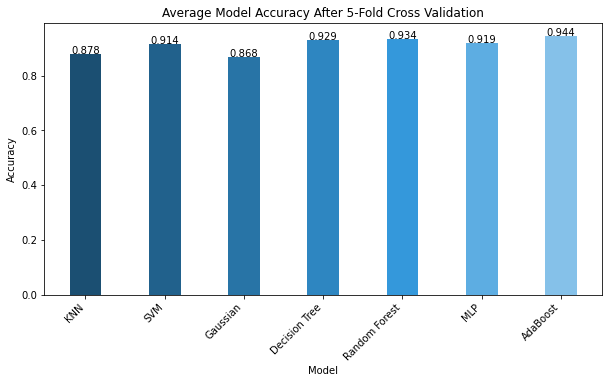

[0.8784615384615384, 0.9141025641025641, 0.8683333333333334, 0.9288461538461539, 0.9342307692307692, 0.9192307692307692, 0.9444871794871794]


In [28]:
# Creating the dataset of scores
data = {
    'KNN':mean_scores[0], 
    'SVM':mean_scores[1],  
    'Gaussian':mean_scores[2], 
    'Decision Tree':mean_scores[3], 
    'Random Forest':mean_scores[4], 
    'MLP':mean_scores[5], 
    'AdaBoost':mean_scores[6], 
}
model_names = list(data.keys())
accuracy_values = list(data.values())
  
# Creating the bar plot
plt.figure(figsize=(10, 5))
plt.bar(model_names, 
        accuracy_values,  
        width = 0.4, 
        color = ['#1B4F72', '#21618C', '#2874A6', '#2E86C1', '#3498DB', '#5DADE2', '#85C1E9', '#AED6F1', '#D4E6F1'])
addLabels(model_names, accuracy_values)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Average Model Accuracy After 5-Fold Cross Validation")
plt.xticks(rotation=45, ha='right')
plt.show()

print(accuracy_values)

## End of Notebook. Thank you for checking out my project!

**Note**: An addition of ROC curves and confusion matrixes would be a great option. However, these were excluded from the project due to the high amount of graphs outputing from the loop of classifiers, resulting in an increased time complexity (+ 1-2 hours).